The Loan Dataset of a bank is given
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.


In [ ]:
# import libraries
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
from scipy.special import logit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings


In [ ]:
# read the data
df = pd.read_csv('/content/train_loan (1).csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.Loan_Status.value_counts(normalize= True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


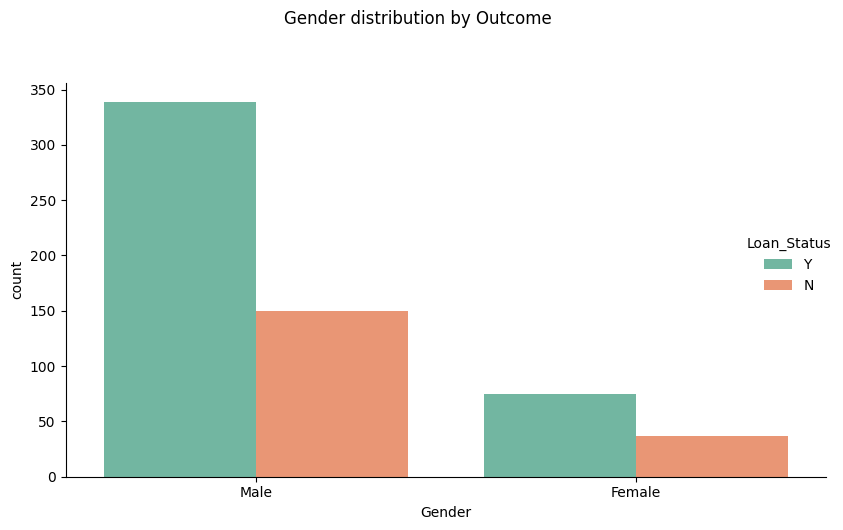

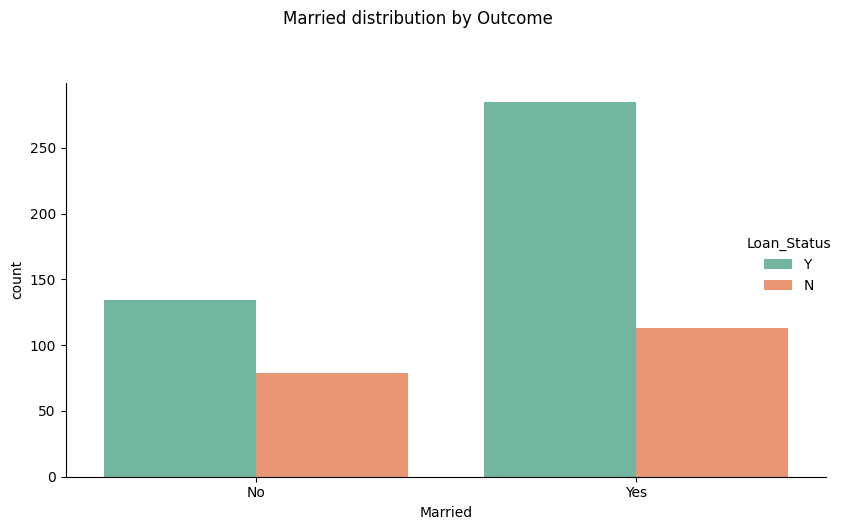

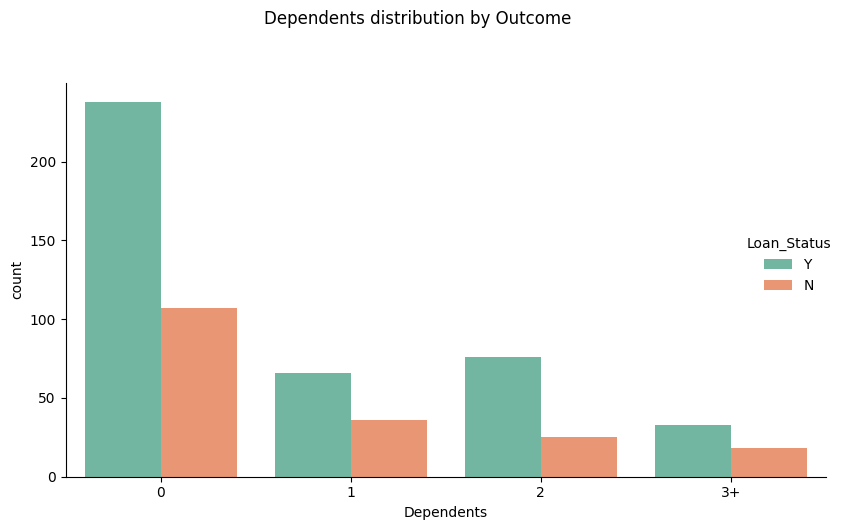

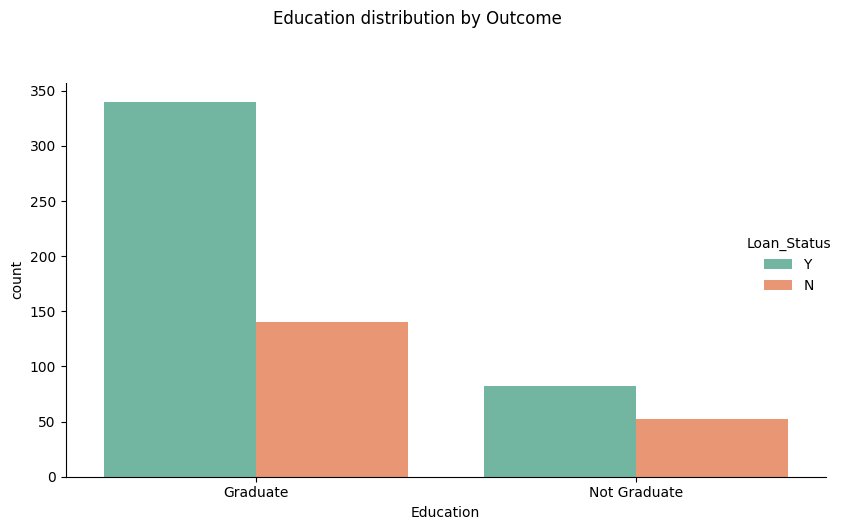

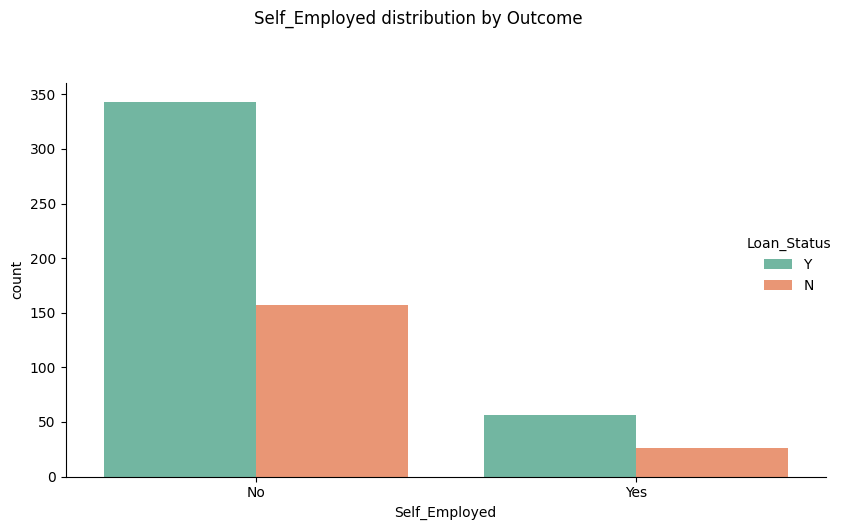

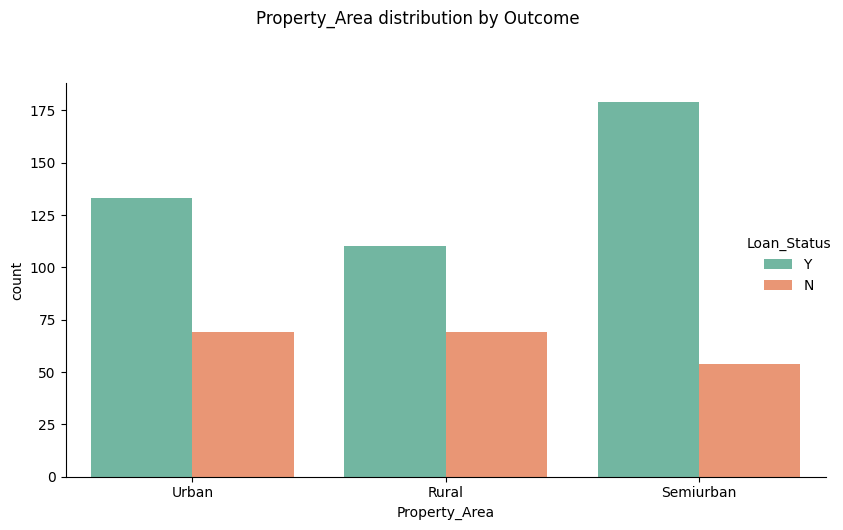

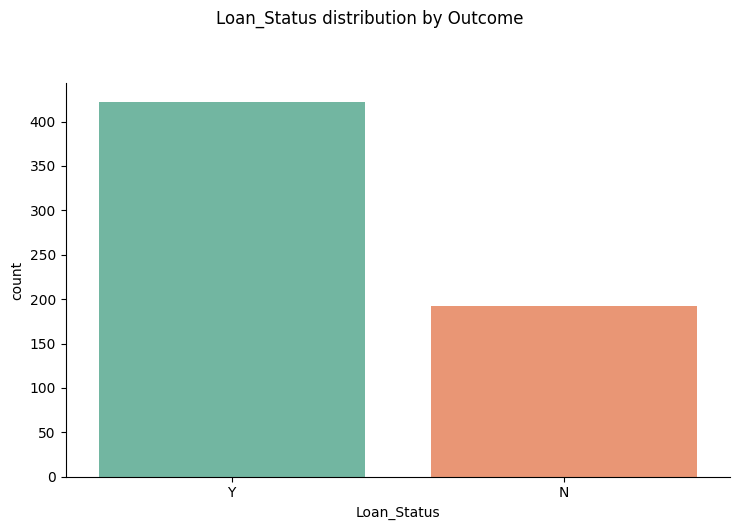

In [ ]:
for col in cat_cols:
    g = sns.catplot(
        data=df, x=col, hue='Loan_Status', kind='count',
        palette='Set2', height=5, aspect=1.5
    )
    g.fig.suptitle(f'{col} distribution by Outcome', y=1.05)
    plt.tight_layout()
    plt.show()

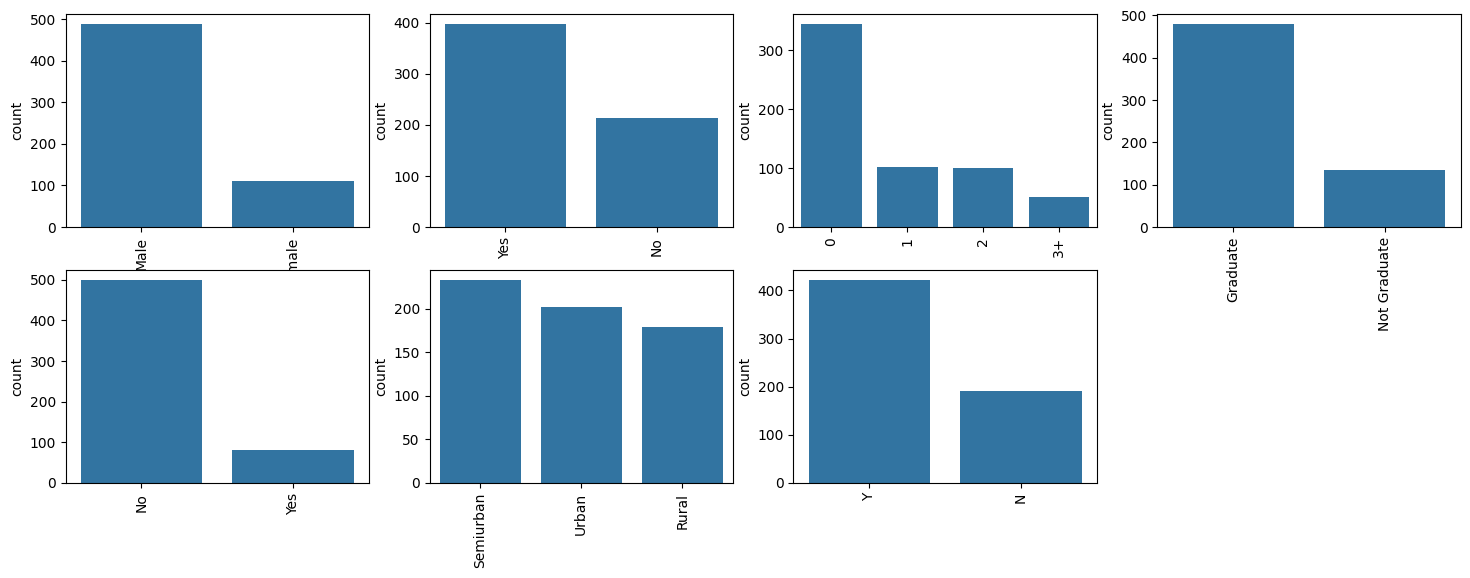

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [ ]:
#all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

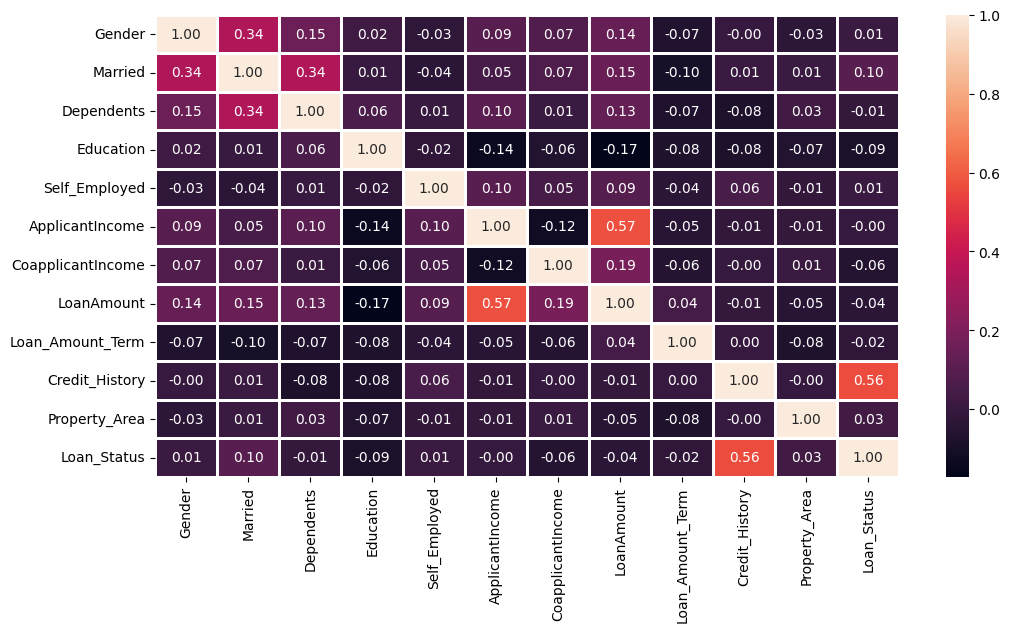

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),fmt='.2f',
            linewidths=2,annot=True)

heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.



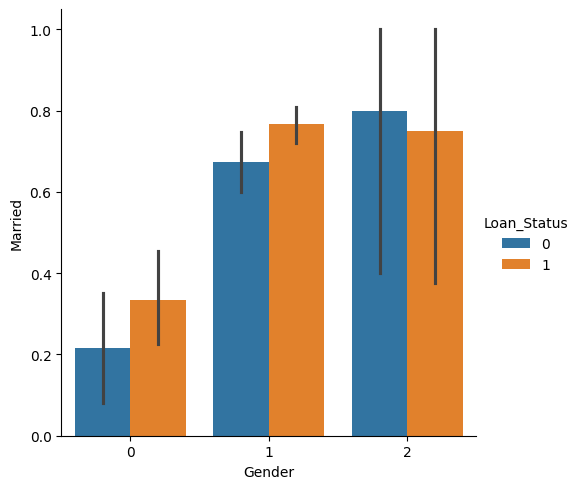

In [ ]:
#Catplot to visualize the plot for the Gender, and Marital Status of the applicant.


sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=df)

In [ ]:
# check formissing values if do replace with mean
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# splitting the data set
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [ ]:
# Initialize the LightGBM model with the best parameters
best_params = {
    'num_leaves': 465,
    'learning_rate': 0.04663603151769226,
    'n_estimators': 777,
    'subsample_for_bin': 195133,
    'reg_alpha': 3.2248883860641223e-06,
    'reg_lambda': 0.002493073926875983,
    'max_depth': 4,
    'colsample_bytree': 0.5916216317286411,
    'subsample': 0.8972848131126971,
    'min_child_samples': 23
}

# Create the LightGBM classifier with the best parameters
lgb_model = LGBMClassifier(**best_params)

# Train the model
lgb_model.fit(X_train, Y_train)


[LightGBM] [Info] Number of positive: 257, number of negative: 111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 368, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698370 -> initscore=0.839546
[LightGBM] [Info] Start training from score 0.839546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(colsample_bytree=0.5916216317286411,
               learning_rate=0.04663603151769226, max_depth=4,
               min_child_samples=23, n_estimators=777, num_leaves=465,
               reg_alpha=3.2248883860641223e-06,
               reg_lambda=0.002493073926875983, subsample=0.8972848131126971,
               subsample_for_bin=195133)

In [ ]:
# Predict on the validation set
y_pred_val = lgb_model.predict(X_test)

In [ ]:
# Evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy_lgb = accuracy_score(Y_test, y_pred_val)
print(f"Validation Accuracy: {accuracy_lgb}")

Validation Accuracy: 0.7479674796747967


In [ ]:
#Training Random Forest Classifier with best hyperparameter
# initialize the best hyperparameters of random forest classifier
rf_params = {
    'n_estimators': 1000,               # Number of trees in the forest
    'max_depth': 10,                    # Maximum depth of each tree
    'min_samples_split': 2,             # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,              # Minimum number of samples required to be at a leaf node
    'max_features': 'sqrt',             # Number of features to consider when looking for the best split
    'bootstrap': True                   # Whether bootstrap samples are used when building trees
}

# create the rf_model
rf_model = RandomForestClassifier(**rf_params)

# train the model
rf_model.fit(X_train, Y_train)

# predict the validation set
y_pred_val_rf = rf_model.predict(X_test)

# evaluate the accuracy
accuracy_rf = accuracy_score(Y_test, y_pred_val)
print(f"Validation Accuraccy: {accuracy_rf:.4f}")

Validation Accuraccy: 0.7480


In [ ]:
#Training Random XGBoost Classifier with best hyperparameters¶
# initialize the best hyperparameters of xgboost classifier
xgb_params = {
    'n_estimators': 500,               # Number of boosting rounds
    'max_depth': 6,                    # Maximum depth of the trees
    'learning_rate': 0.05,             # Step size shrinkage to prevent overfitting
    'colsample_bytree': 0.8,           # Subsample ratio of columns when constructing each tree
    'subsample': 0.8,                  # Subsample ratio of training instances
    'reg_alpha': 0.1,                  # L1 regularization term on weights
    'reg_lambda': 0.3                  # L2 regularization term on weights
}

# create the xgb_model
xgb_model = XGBClassifier(**xgb_params)

# train the model
xgb_model.fit(X_train, Y_train)

# predict the validation set
y_pred_val_xgb = xgb_model.predict(X_test)

# evaluate the accuracy
accuracy_xgb = accuracy_score(Y_test, y_pred_val_xgb)
print(f"Validation Accuracy (XGBoost): {accuracy_xgb:.4f}")


Validation Accuracy (XGBoost): 0.7602


In [ ]:
#Training K-Nearest Neighbors (KNN) Classifier with best hyperparameters
# initialize the best hyperparameters of knn classifier
knn_params = {
    'n_neighbors': 5,                 # Number of neighbors to use
    'weights': 'uniform',             # Weight function used in prediction
    'algorithm': 'auto',              # Algorithm used to compute the nearest neighbors
    'leaf_size': 30,                  # Leaf size passed to BallTree or KDTree
    'p': 2                            # Power parameter for the Minkowski metric
}

# create the knn_model
knn_model = KNeighborsClassifier(**knn_params)

# train the model
knn_model.fit(X_train, Y_train)

# predict the validation set
y_pred_val_knn = knn_model.predict(X_test)

# evaluate the accuracy
accuracy_knn = accuracy_score(Y_test, y_pred_val_knn)
print(f"Validation Accuracy (KNN): {accuracy_knn:.4f}")

Validation Accuracy (KNN): 0.6382


In [ ]:
#Training Decision Tree Classifier with best hyperparameters
# initialize the best hyperparameters of decision tree classifier
dt_params = {
    'max_depth': 10,                  # Maximum depth of the tree
    'min_samples_split': 2,           # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,            # Minimum number of samples required to be at a leaf node
    'criterion': 'gini'               # Function to measure the quality of a split
}

# create the dt_model
dt_model = DecisionTreeClassifier(**dt_params)

# train the model
dt_model.fit(X_train, Y_train)
# predict the validation set
y_pred_val_dt = dt_model.predict(X_test)

# evaluate the accuracy
accuracy_dt = accuracy_score(Y_test, y_pred_val_dt)
print(f"Validation Accuracy (Decision Tree): {accuracy_dt:.4f}")


Validation Accuracy (Decision Tree): 0.7236


/tmp/ipython-input-91-3113925288.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


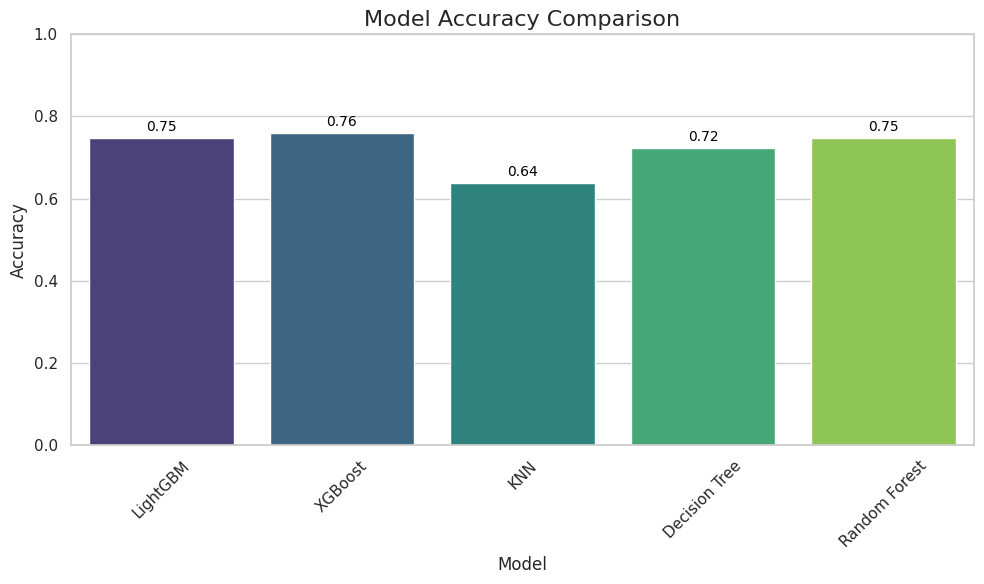

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names and their corresponding accuracies
model_names = [
    'LightGBM',
    'XGBoost',
    'KNN',
    'Decision Tree',
    'Random Forest'
]

# Replace these values with the actual accuracies from your models
model_accuracies = [
    accuracy_lgb,       # LightGBM accuracy
    accuracy_xgb,      # XGBoost accuracy
    accuracy_knn,      # KNN accuracy

    accuracy_dt,        # Decision Tree accuracy
    accuracy_rf
]
# Create a DataFrame for easier plotting
import pandas as pd

accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': model_accuracies
})

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits (0 to 1 for accuracy)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the value of accuracy on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', rotation=0,
                      xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame from the accuracies dictionary
accuracy_df = pd.DataFrame(model_names, model_accuracies)
accuracy_df.head(10)

,0
0.747967,LightGBM
0.760163,XGBoost
0.638211,KNN
0.723577,Decision Tree
0.747967,Random Forest


In [ ]:
#Hyperparameter Tuning with GridSearchCV
# Define the model
from sklearn.model_selection import GridSearchCV
model = LGBMClassifier()

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Evaluating LightGBM
Accuracy: 0.7480
Precision: 0.7696
Recall: 0.8909
F1 Score: 0.8258
ROC-AUC Score: 0.6738

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.54        81
           1       0.77      0.89      0.83       165

    accuracy                           0.75       246
   macro avg       0.72      0.67      0.68       246
weighted avg       0.74      0.75      0.73       246



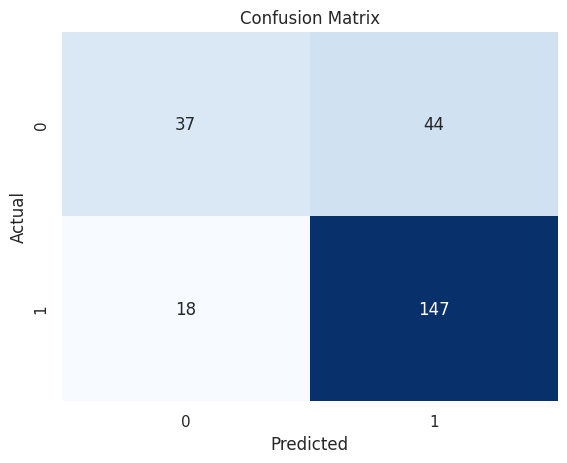



Evaluating Random Forest
Accuracy: 0.7764
Precision: 0.7644
Recall: 0.9636
F1 Score: 0.8525
ROC-AUC Score: 0.6793

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.40      0.54        81
           1       0.76      0.96      0.85       165

    accuracy                           0.78       246
   macro avg       0.80      0.68      0.70       246
weighted avg       0.79      0.78      0.75       246



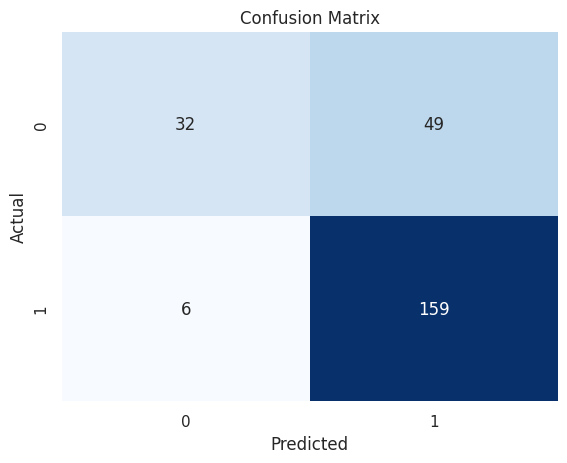



Evaluating XGBoost
Accuracy: 0.7602
Precision: 0.7789
Recall: 0.8970
F1 Score: 0.8338
ROC-AUC Score: 0.6892

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.48      0.57        81
           1       0.78      0.90      0.83       165

    accuracy                           0.76       246
   macro avg       0.74      0.69      0.70       246
weighted avg       0.75      0.76      0.75       246



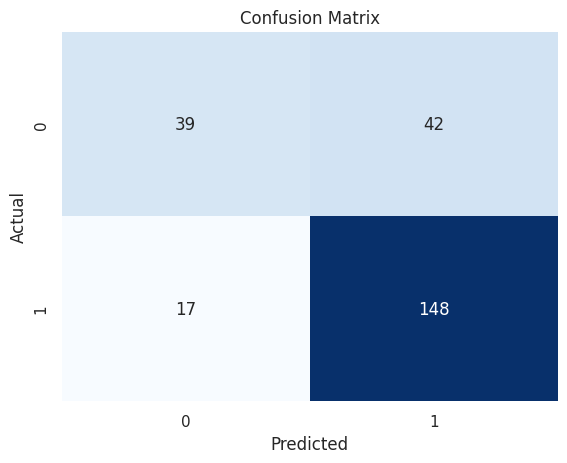

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models
models = {
    "LightGBM": lgb_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Function to evaluate model performance
def evaluate_model(model, X_test, Y_test):
    # Predict on validation set
    y_pred = model.predict(X_test)

    # Calculate different metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    print("\nClassification Report:\n", classification_report(Y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate all models
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    evaluate_model(model, X_test, Y_test)
    print("\n" + "="*50 + "\n")


In [ ]:
#Model Selection: LightGBM, Random Forest, and XGBoost have been chosen as the best models for this project based on their high accuracy.